In [ ]:
# First go to your Kaggle account and create New API Token, a kaggle.json file will be download.

# Second
# Select the kaggle.json file.
from google.colab import files
files.upload()

# Make sure you have a kaggle.json file.
!ls -lha kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json






Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 63 Dec 10 10:15 kaggle.json
kaggle.json


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/datasets

/content/gdrive/MyDrive/datasets


In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000


100% 5.19G/5.20G [00:33<00:00, 236MB/s]
100% 5.20G/5.20G [00:33<00:00, 165MB/s]


In [ ]:
# Unzip data in Google Drive
!unzip -q /content/gdrive/MyDrive/datasets/skin-cancer-mnist-ham10000.zip -d '/content/gdrive/MyDrive/datasets'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image


In [ ]:
skin_df = pd.read_csv('/content/gdrive/MyDrive/datasets/HAM10000_metadata.csv')

In [ ]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
skin_df = skin_df[skin_df['dx'].isin(['bkl','bcc','df'])]

In [ ]:
skin_df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             10
sex              0
localization     0
dtype: int64

In [ ]:
skin_df.drop(['age'] , axis = 1 , inplace = True)

In [ ]:
import os 

In [ ]:
for i in skin_df.index:
 
  x = skin_df.loc[i,'image_id']
  if os.path.isfile(f'/content/gdrive/MyDrive/datasets/HAM10000_images_part_1/{x}.jpg') == True:
    skin_df.loc[i,'image_path'] = f'/content/gdrive/MyDrive/datasets/HAM10000_images_part_1/{x}.jpg'
  else:
    skin_df.loc[i,'image_path'] = f'/content/gdrive/MyDrive/datasets/HAM10000_images_part_2/{x}.jpg'
    
 



  

In [ ]:
skin_df['image'] = skin_df['image_path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))


In [ ]:
# skin_df['image_224'] = skin_df['image_path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))


In [ ]:
skin_df

,lesion_id,image_id,dx,dx_type,sex,localization,image_path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,male,scalp,/content/gdrive/MyDrive/datasets/HAM10000_imag...,"[[[187, 150, 192], [190, 154, 195], [192, 156,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,male,scalp,/content/gdrive/MyDrive/datasets/HAM10000_imag...,"[[[24, 13, 22], [25, 13, 23], [24, 14, 23], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,male,scalp,/content/gdrive/MyDrive/datasets/HAM10000_imag...,"[[[186, 127, 135], [188, 129, 137], [191, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,male,scalp,/content/gdrive/MyDrive/datasets/HAM10000_imag...,"[[[23, 11, 15], [24, 11, 18], [24, 10, 19], [2..."
4,HAM_0001466,ISIC_0031633,bkl,histo,male,ear,/content/gdrive/MyDrive/datasets/HAM10000_imag...,"[[[125, 83, 105], [132, 89, 112], [138, 93, 11..."
...,...,...,...,...,...,...,...,...
3326,HAM_0002276,ISIC_0025366,bkl,consensus,female,trunk,/content/gdrive/MyDrive/datasets/HAM10000_imag...,"[[[235, 190, 197], [237, 190, 200], [238, 193,..."
7100,HAM_0006159,ISIC_0028977,bkl,consensus,female,upper extremity,/content/gdrive/MyDrive/datasets/HAM10000_imag...,"[[[128, 94, 89], [138, 100, 95], [147, 106, 92..."
9546,HAM_0003807,ISIC_0032655,bkl,consensus,male,unknown,/content/gdrive/MyDrive/datasets/HAM10000_imag...,"[[[174, 160, 188], [174, 160, 190], [174, 162,..."
9630,HAM_0003807,ISIC_0033620,bkl,consensus,male,unknown,/content/gdrive/MyDrive/datasets/HAM10000_imag...,"[[[148, 128, 153], [147, 132, 153], [150, 136,..."


In [ ]:
skin_df = skin_df.dropna()

In [ ]:
print((skin_df['dx'] == "df").sum()) 
print((skin_df['dx'] == "bcc").sum()) 
print((skin_df['dx'] == "bkl").sum()) 
print(len(skin_df))
x = 115 + 514 + 1099
print(x)

115
514
1099
1728
1728


In [ ]:
df = skin_df[skin_df['dx'] == "df"]['image'].tolist()
bcc = skin_df[skin_df['dx'] == "bcc"]['image'].tolist()
bkl = skin_df[skin_df['dx'] == "bkl"]['image'].tolist()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
import cv2


from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import skimage
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# # example of brighting image augmentation
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(featurewise_center=True , featurewise_std_normalization = True )
# df_2 = datagen.fit(df)
# from google.colab.patches import cv2_imshow
# for i in df_2:
#   cv2_imshow(i)


In [ ]:
df_extended = []

for i in df:
  df_extended.append(i)
  df_extended.append(np.array(tf.image.flip_up_down(i)))
  df_extended.append(np.array(tf.image.flip_left_right(i)))
  df_extended.append(np.array(tf.image.random_flip_up_down(i)))
  df_extended.append(np.array(tf.image.random_flip_left_right(i)))
  df_extended.append(np.array(tf.image.rot90(i, k=1)))
  df_extended.append(np.array(tf.image.random_brightness(i, max_delta=0.5)))
  df_extended.append(np.array(tf.image.random_brightness(i, max_delta=0.6)))





In [ ]:
bcc_extended = []
for i in bcc:
  bcc_extended.append(i)
  bcc_extended.append(np.array(tf.image.flip_left_right(i)))

In [ ]:
X = []
y = []
for i in range(len(df_extended)):
  X.append(df_extended[i])
  y.append(0)

for i in range(len(bcc_extended)):
  X.append(bcc_extended[i])
  y.append(1)

for i in range(len(bkl)):
  X.append(bkl[i])
  y.append(2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model_1 = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
model_1.trainable = False

In [ ]:
model = Sequential()
model.add(model_1)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(3 , activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_4 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_5 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 131,185,731
Trainable params: 111,161,34

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=43)

In [ ]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)
X_valid = np.array(X_valid)/255
y_valid = np.array(y_valid)

In [ ]:
history1 = model.fit(X_train, y_train, epochs = 200, verbose=1 ,  validation_data = (X_valid , y_valid))

Epoch 1/200
65/65 [==============================] - 29s 282ms/step - loss: 4.2780 - accuracy: 0.3718 - val_loss: 1.0612 - val_accuracy: 0.4536
Epoch 2/200
65/65 [==============================] - 15s 225ms/step - loss: 0.9741 - accuracy: 0.5225 - val_loss: 0.9343 - val_accuracy: 0.5820
Epoch 3/200
65/65 [==============================] - 15s 224ms/step - loss: 0.8707 - accuracy: 0.6050 - val_loss: 0.8705 - val_accuracy: 0.5902
Epoch 4/200
65/65 [==============================] - 15s 227ms/step - loss: 0.7471 - accuracy: 0.6596 - val_loss: 0.7859 - val_accuracy: 0.6393
Epoch 5/200
65/65 [==============================] - 15s 227ms/step - loss: 0.6986 - accuracy: 0.6900 - val_loss: 0.7258 - val_accuracy: 0.7186
Epoch 6/200
65/65 [==============================] - 15s 228ms/step - loss: 0.6030 - accuracy: 0.7436 - val_loss: 0.7194 - val_accuracy: 0.6940
Epoch 7/200
65/65 [==============================] - 15s 229ms/step - loss: 0.5896 - accuracy: 0.7412 - val_loss: 0.7443 - val_accuracy:

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
y_label=np.argmax(y_pred , axis=1)
print('accuracy: ',metrics.accuracy_score(y_test, y_label))
print('CL Report: \n',metrics.classification_report(y_test, y_label, zero_division=1))

20/20 [==============================] - 4s 225ms/step
accuracy:  0.8475409836065574
CL Report: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       201
           1       0.84      0.78      0.81       194
           2       0.79      0.87      0.83       215

    accuracy                           0.85       610
   macro avg       0.85      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610



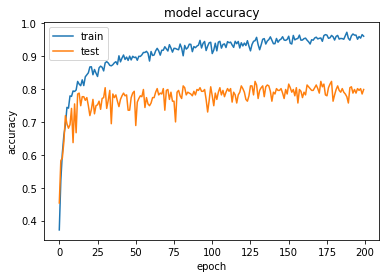

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

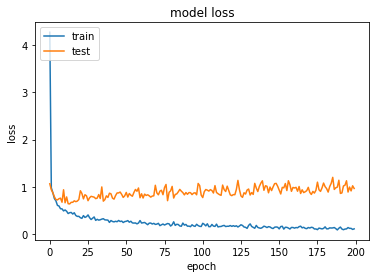

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

20/20 [==============================] - 4s 187ms/step


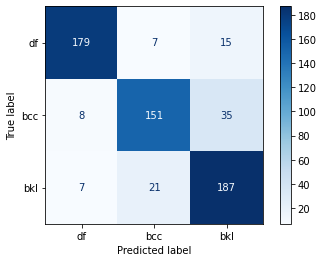

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_test)
y_label=np.argmax(y_pred , axis=1)

labels = ["df", "bcc", "bkl"]

cm = confusion_matrix(list(y_test), list(y_label))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()